# <font color='red'>Parte 3 -  Exploração dos Dados</font>
Nesta etapa veremos exemplos de como análisar os dados.
O Foco desse notebook é puramene para a Exploração dos Dados.
###### Por: Marcus Rosa Godoi

# <font color='grey'>0.0 - IMPORTS</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns



# <font color='grey'>1.0  - COLETAS DE DADOS</font>

Prevendo a Ocorrência de Diabetes.


Conjunto de Dados do Repositório de Machine Learning da UCI / Kaggle.


https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

In [2]:
base1 = pd.read_csv("Dados/diabetes.csv")

In [99]:
base1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 1.1 - Verificação da Base de Dados

In [4]:
# Verificando o formato dos dados

print('Número de Linhas: {}'.format(base1.shape[0]))
print('Número de Colunas: {}'.format(base1.shape[1]))

Número de Linhas: 768
Número de Colunas: 9


In [5]:
# Varificando tipo dos dados

base1.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# Verificando as primeiras linhas do dataset

base1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Verificando as últimas linhas do dataset

base1.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
# Verificando estatisticas básicas dos dados

base1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# <font color='grey'>2.0 - LIMPEZA DOS DADOS</font>

In [3]:
base2 = base1.copy() #Fazer uma copia da base de daods para cada etapa. 
                     #Evitando perde-la caso ocorra uma manipulação errada

## 2.1 - Valores Missing

In [4]:
# Verificando se existem valores nulos na base de dados
base2.isnull().values.any()

False

In [102]:
base2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [103]:
#Locanizar dados nulos pela coluna
base2.loc[pd.isnull(base2['Glucose'])]   #localizar valores Nan por coluna

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


 #### Observação:
 Neste exemplo vimos que não possui valores nulos na base de dados

## 2.2 - Valores Missing Ocultos

In [5]:
# NESTE CASO VALORE IGUAIS A ZERO PARA OS PREVISORES FORAM CONSIFDERADOS MISSING
print("# Linhas no dataframe {0}".format(len(base2)))
#print("# Linhas missing Pregnancies: {0}".format(len(base2.loc[base2['Pregnancies'] == 0])))
print("# Linhas missing Glucose: {0}".format(len(base2.loc[base2['Glucose'] == 0])))
print("# Linhas missing BloodPressure: {0}".format(len(base2.loc[base2['BloodPressure'] == 0])))
print("# Linhas missing SkinThickness: {0}".format(len(base2.loc[base2['SkinThickness'] == 0])))
print("# Linhas missing insulin: {0}".format(len(base2.loc[base2['Insulin'] == 0])))
print("# Linhas missing BMI: {0}".format(len(base2.loc[base2['BMI'] == 0])))
print("# Linhas missing DiabetesPedigreeFunction: {0}".format(len(base2.loc[base2['DiabetesPedigreeFunction'] == 0])))
print("# Linhas missing Age: {0}".format(len(base2.loc[base2['Age'] == 0])))

# Linhas no dataframe 768
# Linhas missing Glucose: 5
# Linhas missing BloodPressure: 35
# Linhas missing SkinThickness: 227
# Linhas missing insulin: 374
# Linhas missing BMI: 11
# Linhas missing DiabetesPedigreeFunction: 0
# Linhas missing Age: 0


## 2.3 - Tratando Dados Missing

 A estratégia adotada foi a de substituir os valores iguais a zero pela média das colunas.
 
 Destacado em vermelho.
 
 Mais de uma delas pode ser realizada dependendo da situação.

#### Substituindo os valores missing, pela média dos dados

In [ ]:
base = base.fillna(base.mean())

#### <font color='red'>Substituindo os valores iguais a zero, pela média dos dados (MISSING OCULTOS)</font>

In [6]:
base2.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [7]:
colunas = list(base2.columns)
medias = list(base2.mean())

In [8]:
for c,m in zip(colunas,medias):
    if (c == 'Outcome')| (c == 'Pregnancies'):
        continue
    for x,i in zip(base2[c], range(base2.shape[0])):
        if (x==0):
            base2.loc[i,c]=m

In [9]:
base2.min()

Pregnancies                  0.000
Glucose                     44.000
BloodPressure               24.000
SkinThickness                7.000
Insulin                     14.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

#### APAGANDO DADOS DE MISSING

In [ ]:
base = base.dropna('Glucose', axis = 0)  #AXIS = 0 APAGA A LINHA
#Neste caso apaga todaas as linhas com valores nulos(missing)

#### APAGANDO DADOS DE MISSING OCULTOS

In [ ]:
i1 = base.loc[base.Glucose == 10] #loc -> localizar (i1 = inconsistentes um)
base = base[base.Glucose > 0] #A BASE DE DADOS AGORA SO POSSUIRÁ OS DADOS ONDE A GLICOSE É MAIOR QUE ZERO 

#### ALTERANDO  DADOS MISSING CATEGORICOS

Não Ocorre neste caso, mas para exemplo 

In [ ]:
# Varialvel categorica, caso não for apaga-la

base['vehicleType'].value_counts() # verificar qual item mais se repete para poder tratar depois ->limousine
#Fazer para todas as colunas que tiverem valores categóricos nulos 

valores = {'vehicleType': 'limousine', 
           'gearbox': 'manuell',
           'model': 'golf', 
           'fuelType': 'benzin',
           'notRepairedDamage': 'nein'}

#NOME DA COLUNA : VALOR QUE MAIS SE REPETE NESSA COLUNA

In [ ]:
base = base.fillna(value = valores)
#tocamos os valorers nulos pelos valores que mais se repetiram

## 2.4 - Outliers

 Detectar outliers usando boxplot.
 Neste caso vamos considerar que os outiliers prejudicam o modelo. 

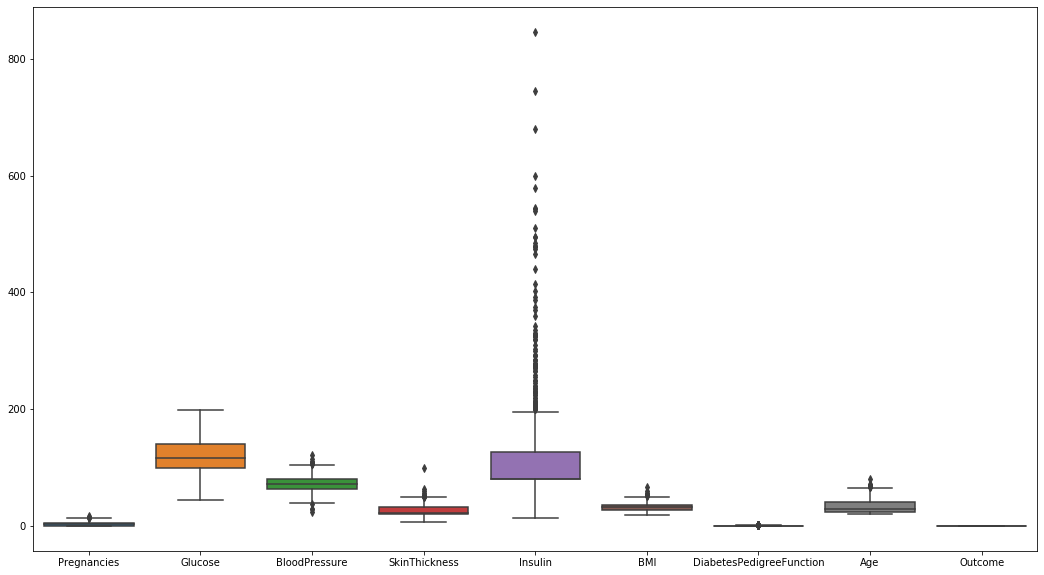

In [110]:
plt.figure(figsize=(18,10))
sns.boxplot(data = base2)

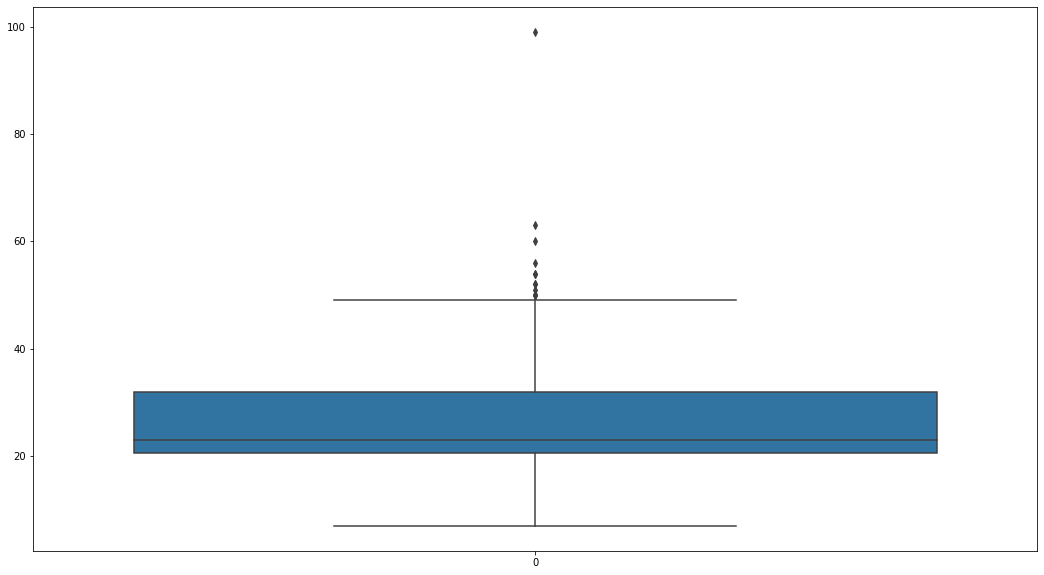

In [111]:
plt.figure(figsize=(18,10))
sns.boxplot(data = base2['SkinThickness'])

## 2.5 - Tratamento de Outliers

#### Substituindo os outliers, pela média dos dados.

Apenas para exemplo.

In [48]:
base2_2 = base2.copy()

In [49]:
d = base2_2.describe()
q1 = d.iloc[4,3] #primeiro quartil - " SkinThickness "
q3 = d.iloc[6,3] #terceiro quartil - " SkinThickness "
iqr = q3 - q1    #Intervalo Interquartil
minimo = q1 - (1.5 * iqr)
maximo = q3 + (1.5 * iqr)

In [50]:
media = base2_2['SkinThickness'] .mean()
media

26.606479220920118

In [51]:
for x,i in zip(base2_2['SkinThickness'], range(base2_2.shape[0])):
    if (x < minimo) | (x > maximo):
        base2_2.loc[i,'SkinThickness'] = media

In [52]:
base2_2.loc[0,'SkinThickness']

35.0

In [53]:
base2_2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [54]:
base2_2['SkinThickness'].max()

49.0

#### Apagando os outliers

In [ ]:
base2_3 = base2.copy()

In [ ]:
d = base2_3.describe()
q1 = d.iloc[4,3] #primeiro quartil - " SkinThickness "
q3 = d.iloc[6,3] #terceiro quartil - " SkinThickness "
iqr = q3 - q1    #Intervalo Interquartil
minimo = q1 - (1.5 * iqr)
maximo = q3 + (1.5 * iqr)

In [ ]:
outliers = base2_3[(base2_3['SkinThickness']>maximo)|(base2_3['SkinThickness']<minimo)]
outliers

In [ ]:
outliers.index

In [ ]:
base2_3 = base2_3.drop(outliers.index)

In [ ]:
base2_3.shape

#### <font color='grey'>Substituindo os outliers usando transformação logarítmica. /font>

## 2.6 - Apagar Colunas

In [10]:
# Lista todas as colunas
list(base2)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [ ]:
nome_coluna = base.NomeDaColuna  #salvar essa coluna caso seja necessário
base = base.drop('NomeDaColuna', axis = 1)     #AXIS = 1 APAGA A COLUNA

# <font color='red'>3.0  - EXPLORAÇÃO DOS DADOS</font>

In [11]:
 base3 = base2.copy()

## 3.1 - Visualização de Estatísticas Básicas

In [12]:
base3.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 3.2 - Histogramas

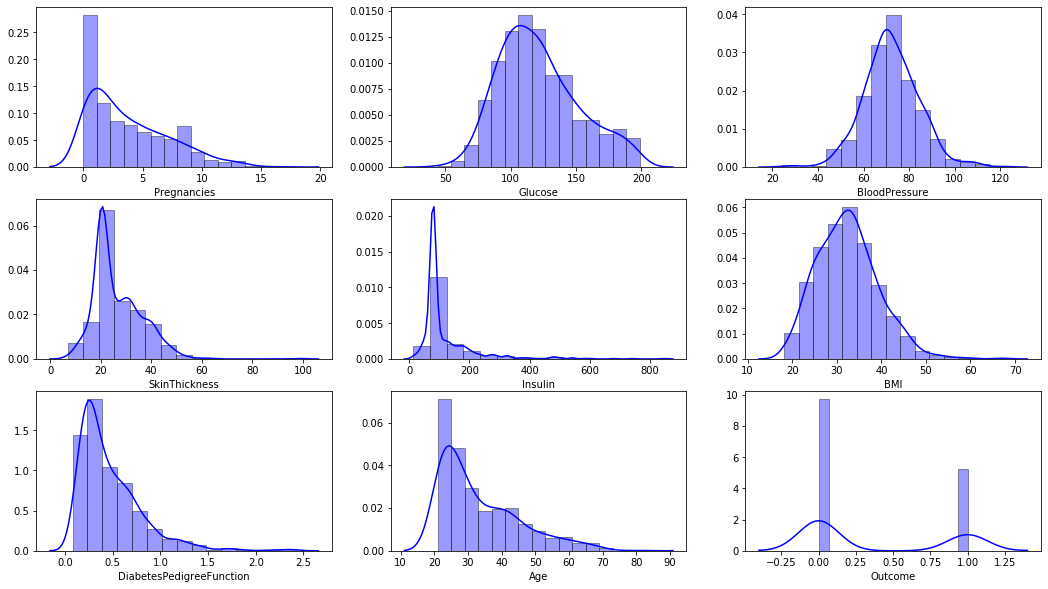

In [98]:
c = base3.shape[1] #número de colunas
p = np.round(c/3) #quantidade de gráficos por linha, quero 3 colunas.

plt.figure(1,figsize=(18,10))
for g in range(c):
    plt.subplot(p,3,g+1)#linhas, colunas, nºdo grafico
    sns.distplot(base3.iloc[:,g], hist = True, kde = True, bins = 15, color = 'blue',hist_kws={'edgecolor': 'black'})

In [95]:
ass = []
cur = []
for i in range (base3.shape[1]):
    ass.append(base3.iloc[i].skew())
    cur.append(base3.iloc[i].kurt())
ac = pd.DataFrame({"Assimetria" : ass, "Curtose" : cur})
ac = ac.set_index(base3.columns)
ac

,Assimetria,Curtose
Pregnancies,1.176046,1.471143
Glucose,0.449655,-1.453506
BloodPressure,1.922612,3.973965
SkinThickness,0.711041,-1.220805
Insulin,1.339072,0.624599
BMI,0.917464,-0.358480
DiabetesPedigreeFunction,0.631051,-0.774090
Age,0.895709,-0.180840
Outcome,2.414030,6.039791


## 3.3 - Análise das Variáveis com a Saída
saída categórica -> gráfico de barras

saída numérica -> gráfico de distribuição

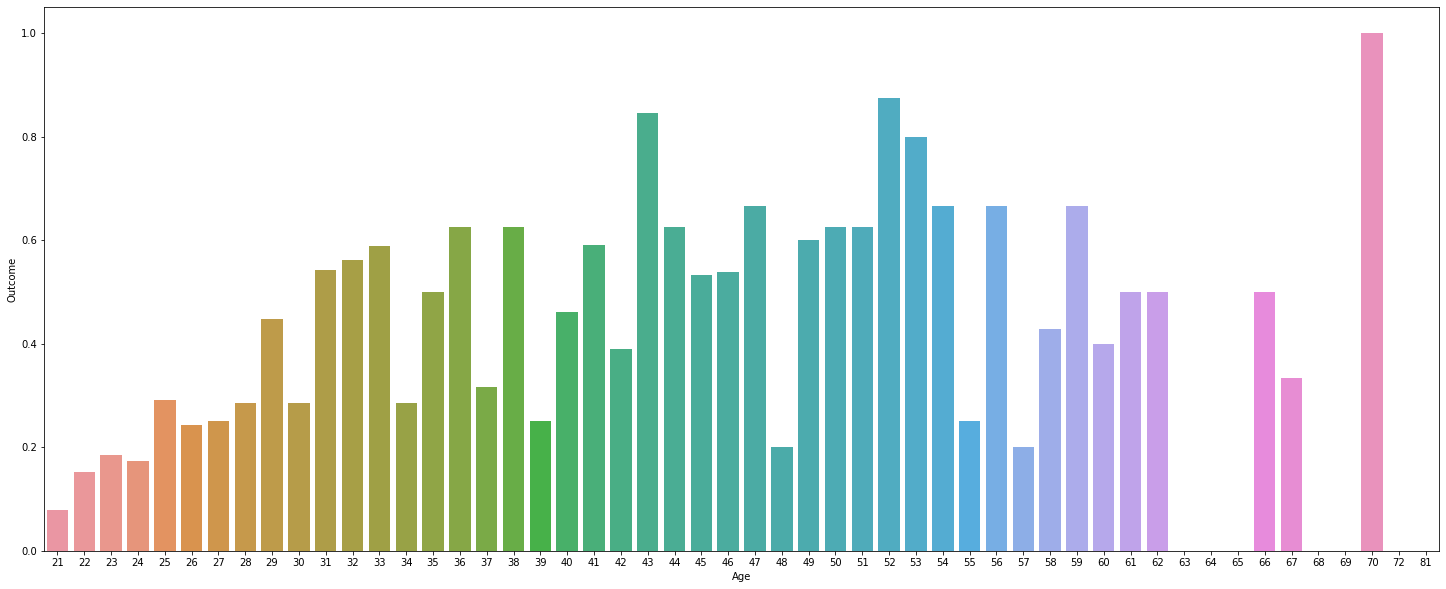

In [119]:
#Qual a relação da idade com a diabetes?

plt.figure(figsize=(25,10))

x = base3.Age
y = base3.Outcome

#Computando os valores e gerando o gráfico

sns.barplot(x,y, ci=None)
plt.xticks(rotation=0);


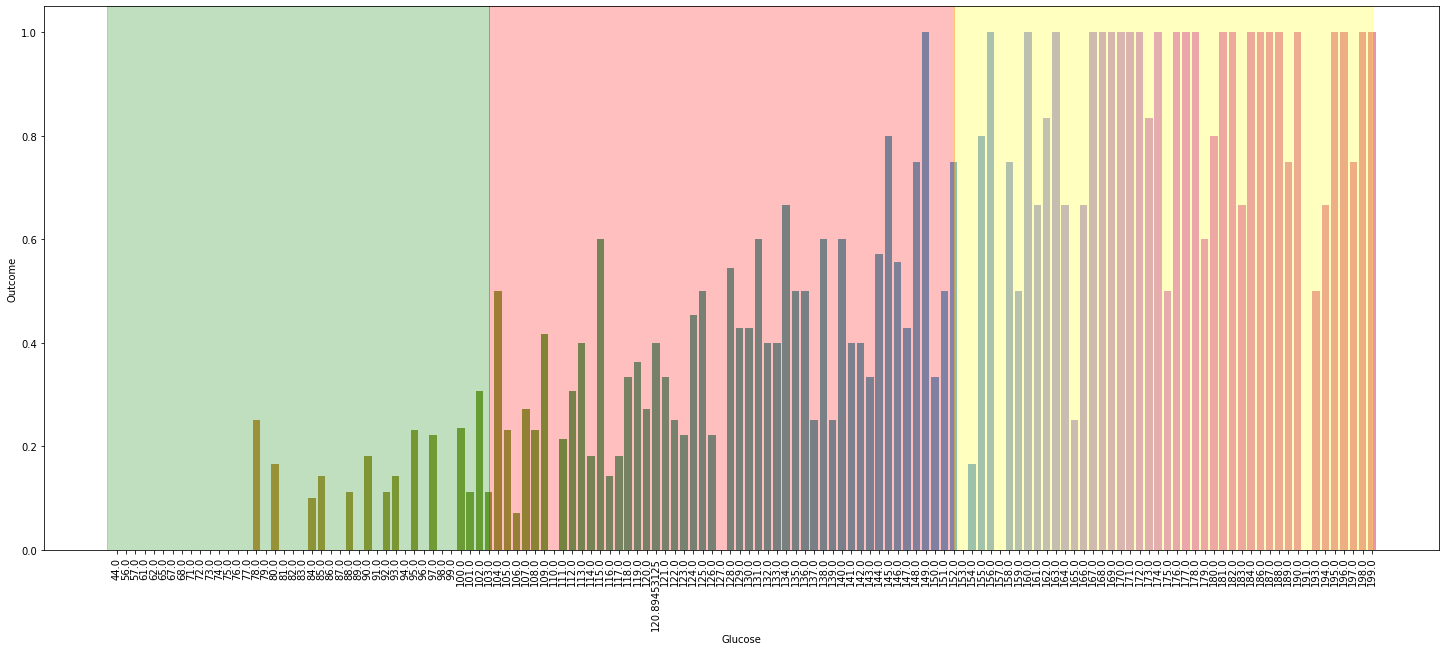

In [117]:
#Qual a relação da idade com a diabetes?

plt.figure(figsize=(25,10))

x = base3.Glucose
y = base3.Outcome

#Computando os valores e gerando o gráfico

# medindo intervalos para visualização
'''l1 = 40
l2 = 90
l1 = np.size(base3[x < l1]['Glucose'].unique())
l2 = np.size(base3[x < l2]['Glucose'].unique())'''

sns.barplot(x,y, ci=None)

plt.axvspan(-1, 40, alpha=0.25, color='green') #separar a visualização
plt.axvspan(40,90, alpha=0.25, color='red')    #medir esses intervalos
plt.axvspan(90, 135, alpha=0.25, color='yellow')

plt.xticks(rotation=90);


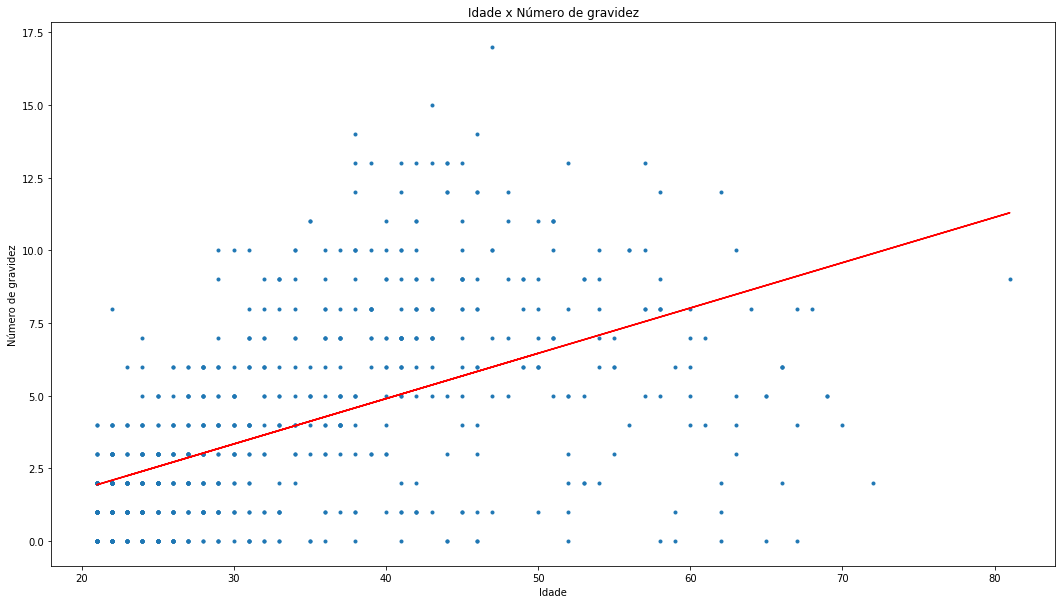

In [115]:
#exemplo para saída numérica

plt.figure(1,figsize=(18,10))

x = base3.Age
y = base3.Pregnancies

#Computando os valores e gerando o gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Idade")
plt.ylabel("Número de gravidez")
plt.title("Idade x Número de gravidez")
plt.show()


## 3.4 - Correlação

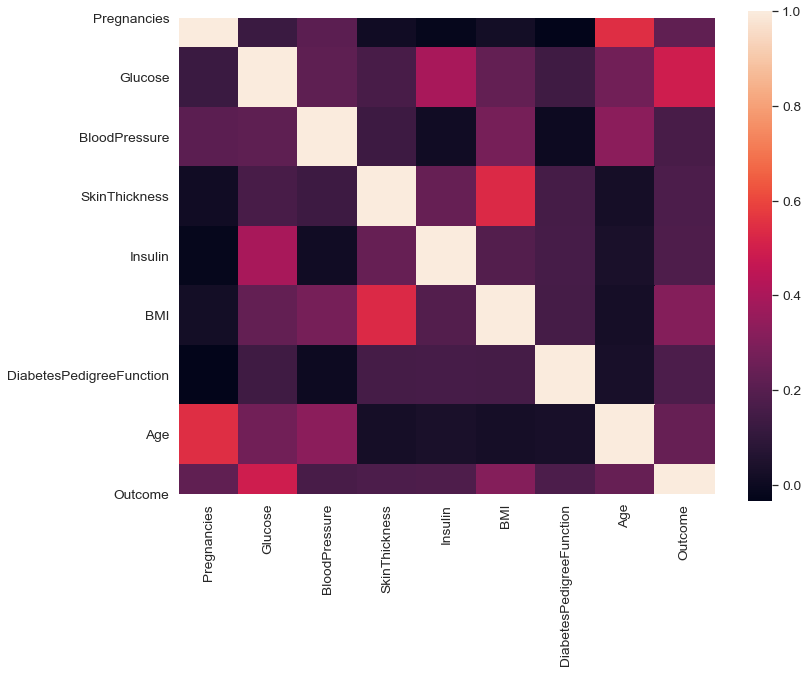

In [139]:
# Identificando a correlação entre as variáveis em geral
# Correlação não implica causalidade
corr = base3.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, square=True);

In [118]:
# Visualizando a correlação em tabela
# Coeficiente de correlação: 
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
base3.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


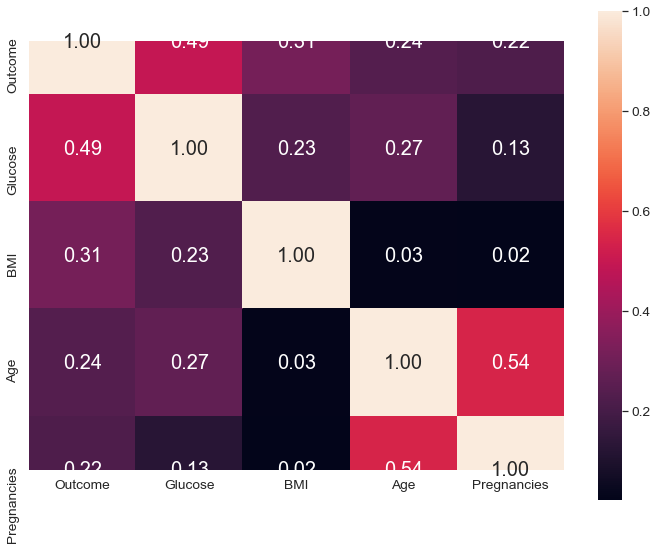

In [141]:
plt.figure(figsize=(12,9))
k = 5 #números de variáveis parra a correlação
cols = corr.nlargest(k, 'Outcome')['Outcome'].index
cm = np.corrcoef(base3[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## 3.5 - Gráfico de Dispersão Entre as Variáveis Mais Correlacionadas.

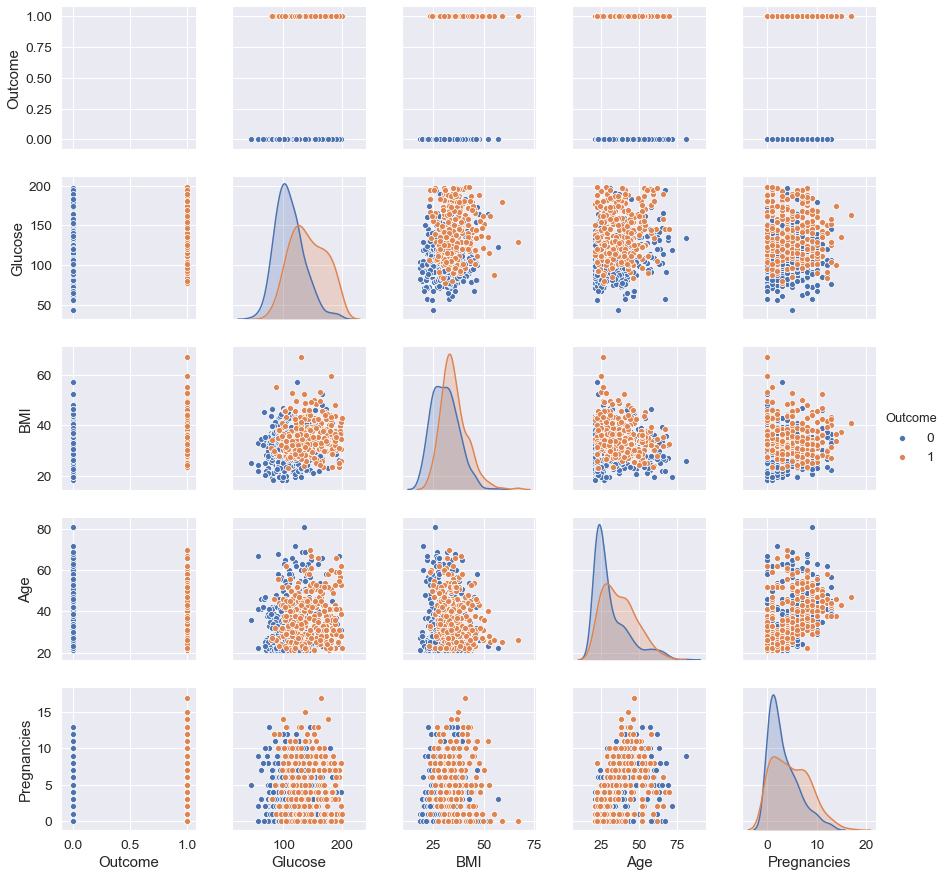

In [153]:
sns.pairplot(base3[cols], hue="Outcome")
#kind="reg"
#height = 5.0
plt.show();

## 3.6 - Verificar as Hipóteses Visualizando as  Relações Entre os Atributos

### 3.6.1 - Idade x Número de gravidez

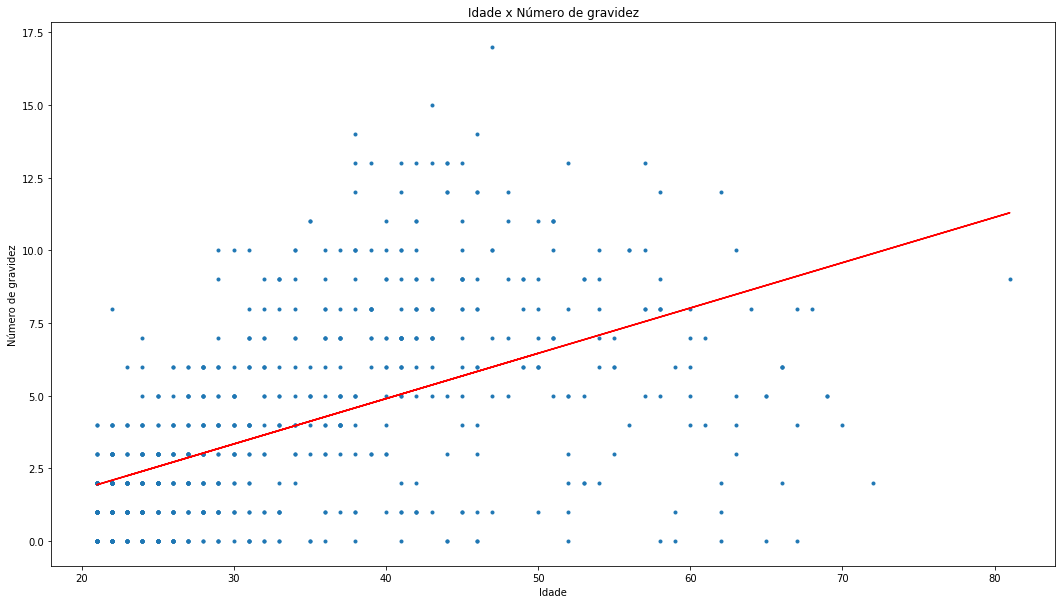

In [125]:
#Qual a relação entre idade e número que as mulhres engravidam?
# A idade das mulheres afeta a quantidade de vezes que engravidam.

plt.figure(1,figsize=(18,10))

x = base3.Age
y = base3.Pregnancies

#Computando os valores e gerando o gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Idade")
plt.ylabel("Número de gravidez")
plt.title("Idade x Número de gravidez")
plt.show()



### 3.6.2 - Idade x Pressão Arterial

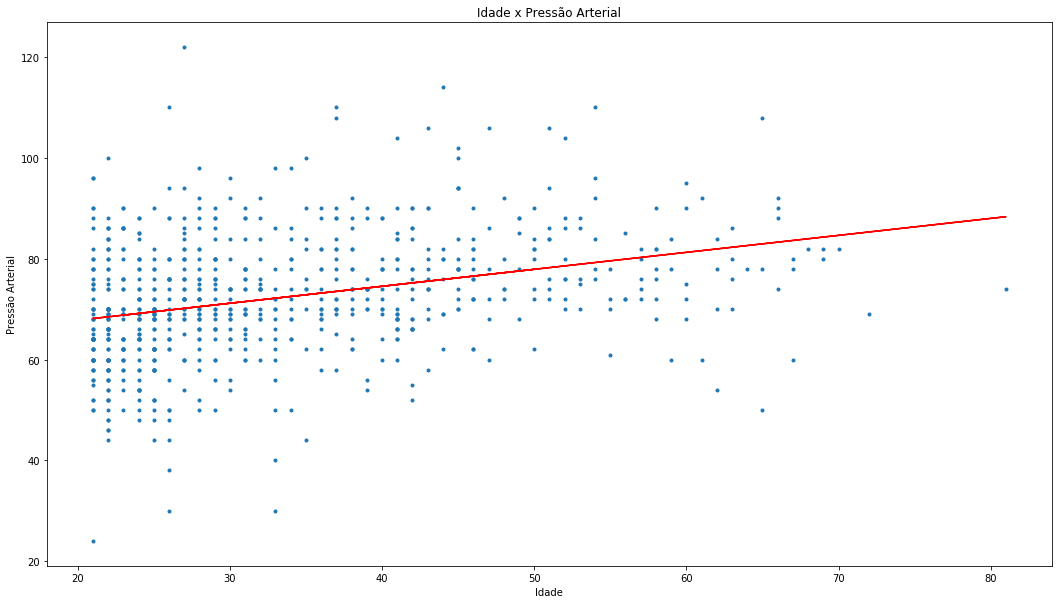

In [126]:
#Qual a relação entre idade e a pressão arterial?
# A idade das mulheres afeta a pressão.

plt.figure(1,figsize=(18,10))

x = base3.Age
y = base3.BloodPressure

#Computando os valores e gerando o gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Idade")
plt.ylabel("Pressão Arterial")
plt.title("Idade x Pressão Arterial")
plt.show()


### 3.6.3 - Insulina x Glicose

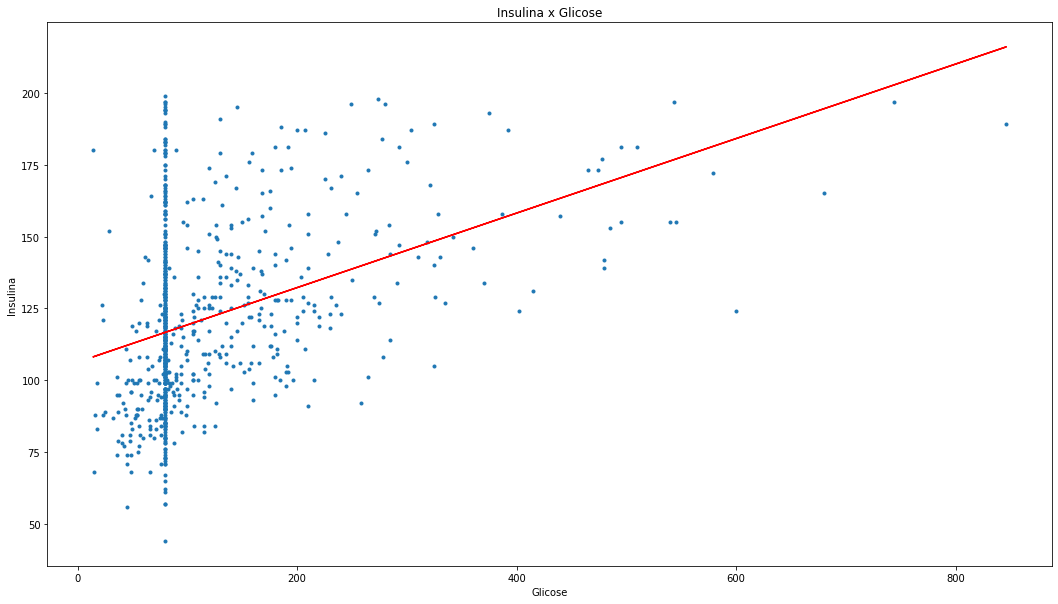

In [127]:
#Qual a relação entre insulina e a pressão arterial?
# A insulna das mulheres afeta a glicose.

plt.figure(1,figsize=(18,10))

x = base3.Insulin
y = base3.Glucose

#Computando os valores e gerando o gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Glicose")
plt.ylabel("Insulina")
plt.title("Insulina x Glicose")
plt.show()

### 3.6.4- IMC x Espessura da pele


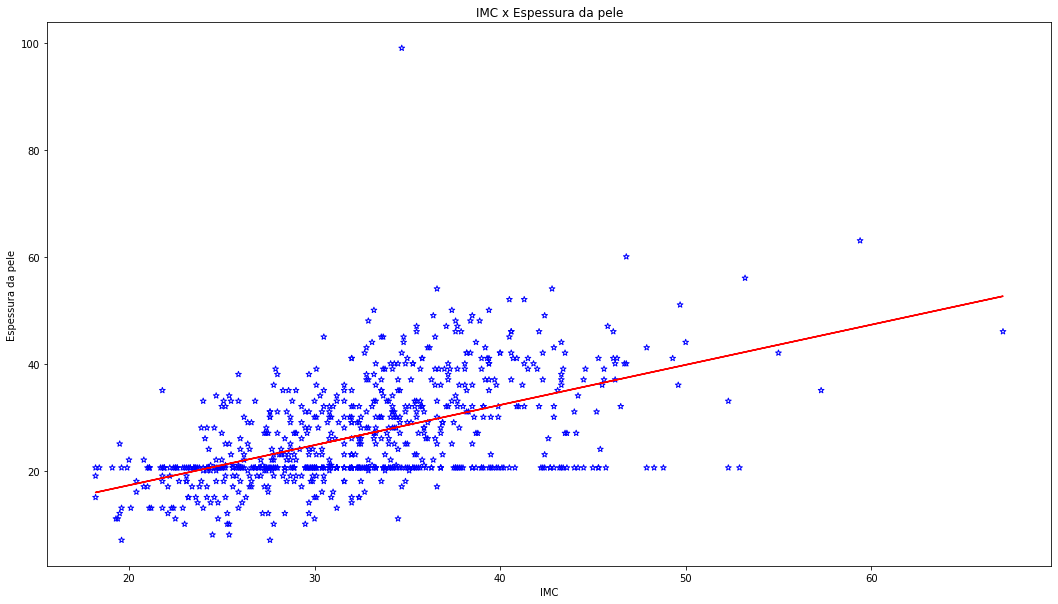

In [139]:
#Qual a relação entre o IMC e a Espessura da pele?
# A Espessura da pele das mulheres afeta o IMC.

plt.figure(1,figsize=(18,10))

x = base3.BMI
y = base3.SkinThickness

#Computando os valores e gerando o gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, '-', color = "red")
plt.scatter(x, y, color = 'blue', facecolors = 'none', marker = '*')

plt.xlabel('IMC')
plt.ylabel('Espessura da pele')
plt.title('IMC x Espessura da pele')
plt.show()

# Fim

### Obrigado - Marcus Rosa Godoi - <a href="https://www.linkedin.com/in/marcus-godoi/">linkedin.com/in/marcus-godoi</a>